## Dataset Information

The dataset contains transactions made by credit cards bycardholders.    
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.  

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.  

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.  

## Import modules

In this section, essential Python libraries are imported for data analysis and visualization. 
These include pandas, numpy, seaborn, and matplotlib.  
Warnings are filtered to be ignored.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

The code reads the credit card dataset from a file named 'creditcard.csv' using pd.read_csv()  
and stores it in a DataFrame named df. 

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [3]:
# statistical info
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Preprocessing the dataset

In [5]:
# check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Exploratory Data Analysis

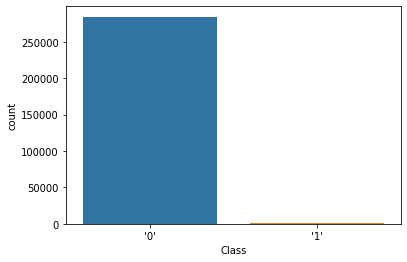

In [6]:
sns.countplot(x='Class',data=df)

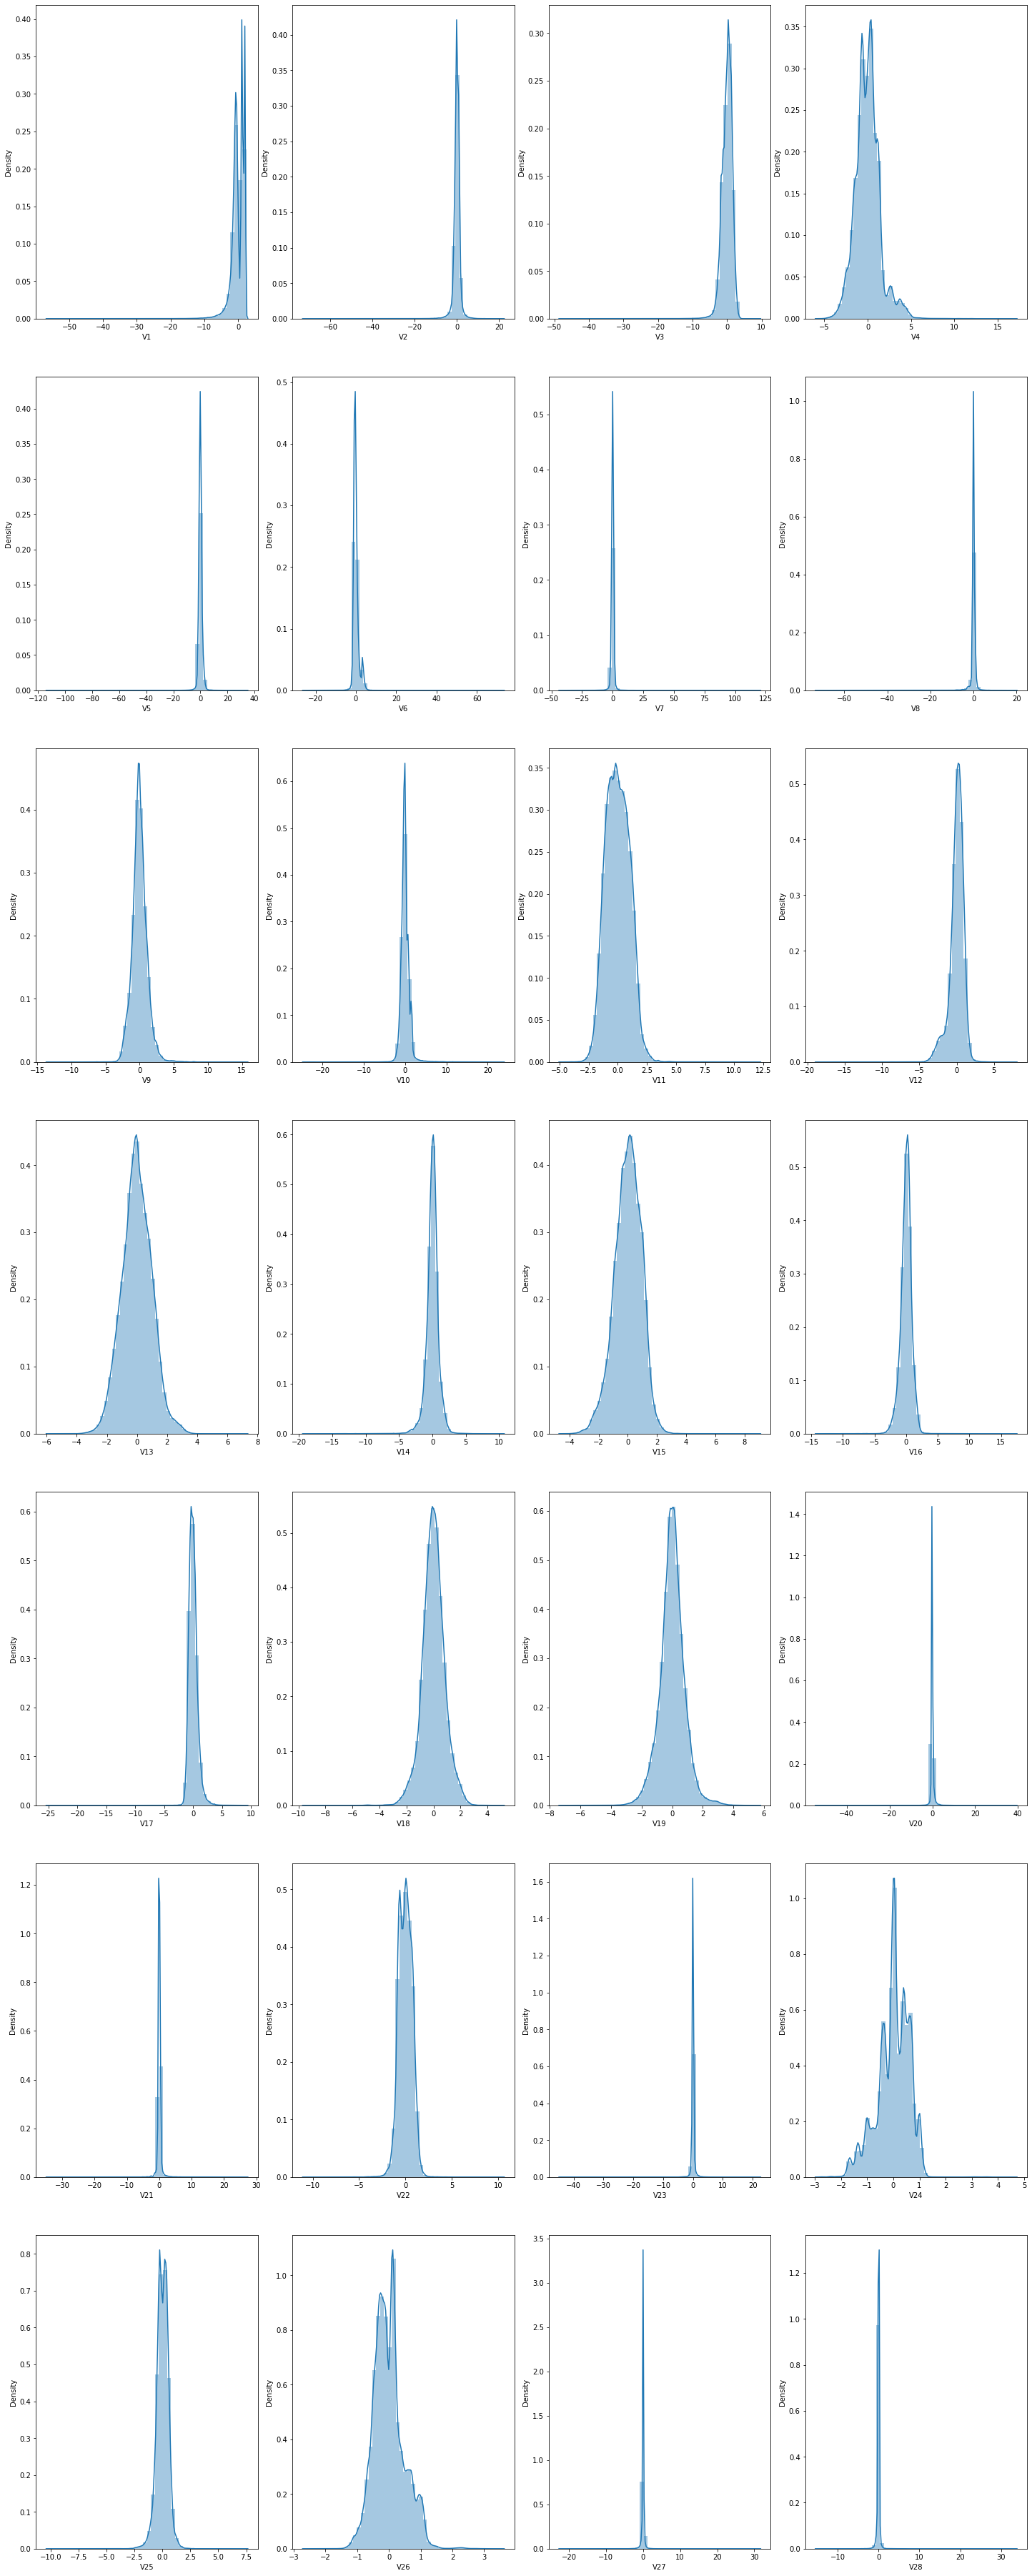

In [7]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

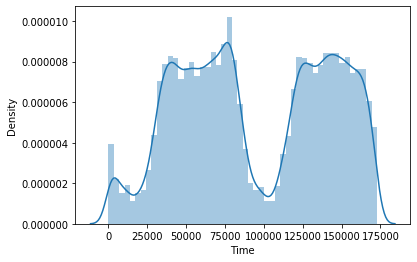

In [8]:
sns.distplot(df['Time'])

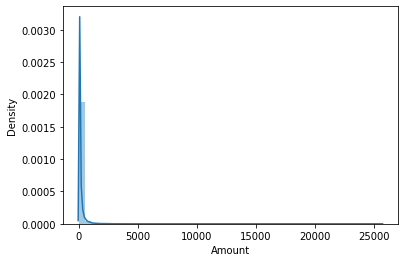

In [9]:
sns.distplot(df['Amount'])

## Coorelation Matrix



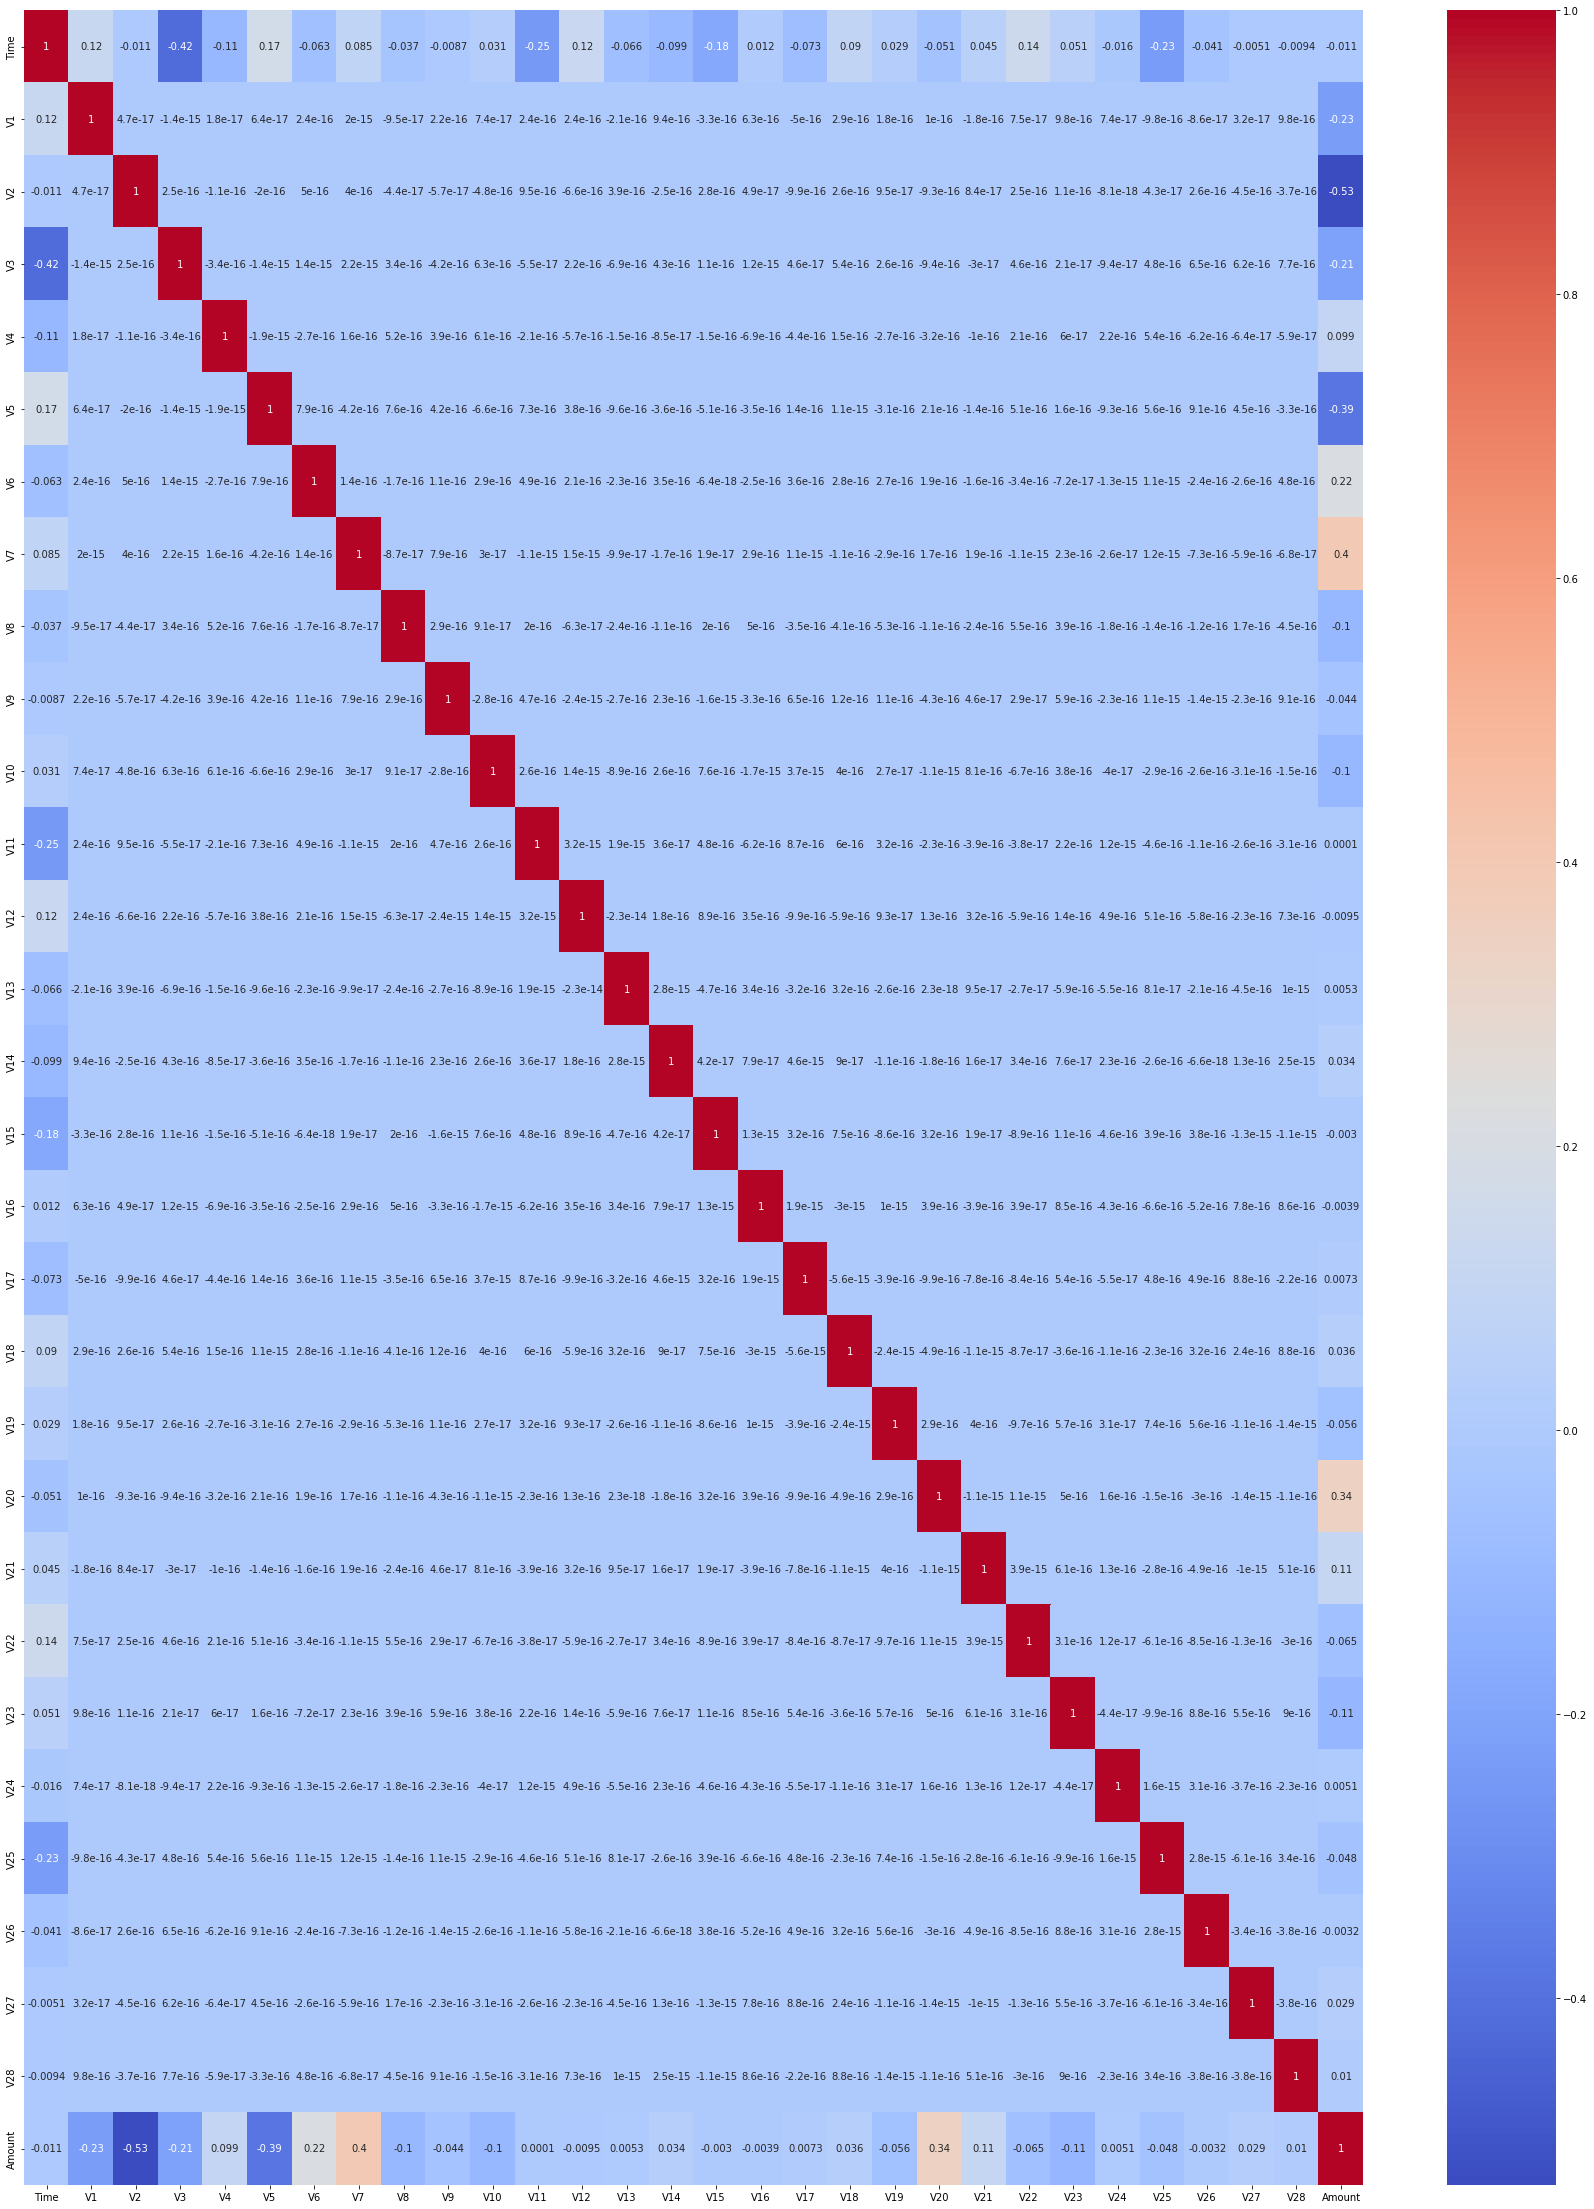

In [10]:
corr = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Input Split

In [11]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

## Standard Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [13]:
x_scaler[-1]

array([ 1.64205773, -0.27233093, -0.11489898,  0.46386564, -0.35757   ,
       -0.00908946, -0.48760183,  1.27476937, -0.3471764 ,  0.44253246,
       -0.84072963, -1.01934641, -0.0315383 , -0.18898634, -0.08795849,
        0.04515766, -0.34535763, -0.77752147,  0.1997554 , -0.31462479,
        0.49673933,  0.35541083,  0.8861488 ,  0.6033653 ,  0.01452561,
       -0.90863123, -1.69685342, -0.00598394,  0.04134999,  0.51435531])

## Model Training

In [14]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42)

### LogisticRegression

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(y_pred)

["'1'" "'0'" "'0'" ... "'0'" "'0'" "'0'"]


In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(y_test,y_pred) 
print(cmf)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[71077    12]
 [   45    68]]
Classification report: 
              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     71089
         '1'       0.85      0.60      0.70       113

    accuracy                           1.00     71202
   macro avg       0.92      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy of the model:  0.9991994606893064


here, we see in recall that class 1 needs more tuning

### RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
y_pred

array(["'1'", "'0'", "'0'", ..., "'0'", "'0'", "'0'"], dtype=object)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(y_test,y_pred) 
print(cmf)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[71083     6]
 [   24    89]]
Classification report: 
              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     71089
         '1'       0.94      0.79      0.86       113

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy of the model:  0.9995786635206876


### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier(random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(x_train,y_train)

#Predict
y_pred=model_DecisionTree.predict(x_test)
#print(y_pred)

feature_importance = model_DecisionTree.feature_importances_
print(feature_importance)

[0.00268467 0.01583901 0.00352428 0.01453741 0.00982749 0.0022249
 0.00254532 0.01600278 0.0006361  0.00737257 0.03728121 0.01512952
 0.03363404 0.01339211 0.11026423 0.01400508 0.01638784 0.54216802
 0.00709052 0.01546406 0.01275193 0.01341585 0.01209714 0.00290656
 0.00905771 0.00568291 0.01917203 0.03164413 0.0039011  0.00935948]


In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(y_test,y_pred) 
print(cmf)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[71055    34]
 [   26    87]]
Classification report: 
              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     71089
         '1'       0.72      0.77      0.74       113

    accuracy                           1.00     71202
   macro avg       0.86      0.88      0.87     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy of the model:  0.9991573270413753


In [21]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier(max_depth=25,min_samples_leaf=10,max_leaf_nodes=300,random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(x_train,y_train)

#Predict
y_pred=model_DecisionTree.predict(x_test)
print(y_pred)

["'1'" "'0'" "'0'" ... "'0'" "'0'" "'0'"]


In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(y_test,y_pred) 
print(cmf)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[71081     8]
 [   29    84]]
Classification report: 
              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     71089
         '1'       0.91      0.74      0.82       113

    accuracy                           1.00     71202
   macro avg       0.96      0.87      0.91     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy of the model:  0.9994803516755147


### Extra Tree Classifier

In [23]:
#Predicting using the Bagging_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier(n_estimators=10,random_state=10)

#fit the data on the model and predict the values
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
#print(y_pred)


In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(y_test,y_pred) 
print(cmf)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[71082     7]
 [   25    88]]
Classification report: 
              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     71089
         '1'       0.93      0.78      0.85       113

    accuracy                           1.00     71202
   macro avg       0.96      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy of the model:  0.9995505744220669


### Gradient Boosting

In [25]:
#predicting using the Gradient_Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=100,random_state=10)
#fit the data on the model to predict the values
model_GradientBoosting.fit(x_train,y_train)
Y_pred=model_GradientBoosting.predict(x_test)
#print(y_pred)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(y_test,y_pred) 
print(cmf)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[71082     7]
 [   25    88]]
Classification report: 
              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     71089
         '1'       0.93      0.78      0.85       113

    accuracy                           1.00     71202
   macro avg       0.96      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy of the model:  0.9995505744220669


### KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=8,metric='euclidean')

#fit the data on the model and predict the values
model_KNN.fit(x_train,y_train)

y_pred=model_KNN.predict(x_test)
#print(y_pred)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(y_test,y_pred) 
print(cmf)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[71076    13]
 [   32    81]]
Classification report: 
              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     71089
         '1'       0.86      0.72      0.78       113

    accuracy                           1.00     71202
   macro avg       0.93      0.86      0.89     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy of the model:  0.9993679952810315


### AdaBoostClassifier


In [29]:
#predicting using the Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                                  n_estimators=10,
                                  random_state=10)
#fit the data on the model to predict the values
model_AdaBoost.fit(x_train,y_train)
y_pred=model_AdaBoost.predict(x_test)
#print(y_pred)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(y_test,y_pred) 
print(cmf)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[71055    34]
 [   27    86]]
Classification report: 
              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     71089
         '1'       0.72      0.76      0.74       113

    accuracy                           1.00     71202
   macro avg       0.86      0.88      0.87     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy of the model:  0.9991432824920649


### Conclusion

Model -- Recall vlaue of class:'0'--  Recall value for class 1 -- Accuracy score

Logistic Regression           -- 1 -- 0.60 -- 0.9991994  
Random Forest Classifier -- 1 -- 0.80 -- 0.9995786 
Decision Tree Classifier -- 1 -- 0.77 -- 0.999157 
Gradient Boosting Classifier 1|0.78|0.9995505  
KNN CLassifier |1|0.72|0.9993679
ADA Boost Classifier |1|0.76|0.9991438  

so, we will go with Random Forest Classifier because it gives higher recall value..


### Conclusion

| Sr.No     |         MOdel                 | Recall Class 0: |  Recall Class 1:  | Accuracy score |
|:---------:|:-----------------------------:|:--------------: |:-----------------:|----------------|
|     1     | Logistic Regression           |   1             |      0.60         | 0.9991994      |
|     2     | Random Forest Classifier      |   1             |      0.80         | 0.9995786      |
|     3     | Decision Tree Classifier      |   1             |      0.77         | 0.999157       |
|     4     | Gradient Boosting Classifier  |   1             |      0.78         | 0.9995505      |
|     5     | KNN CLassifier                |   1             |      0.72         | 0.9993679      |
|     6     | ADA Boost Classifier          |   1             |      0.76         | 0.9991438      |



Here, what we see that all the model have high accuracy score and the class feature having imbalanced data
##### so, we prefer recall call value (Score) and we got highest recall value in "Random Forest Classifier"  os, we will go with it....